In [2]:
from rembg import remove
from PIL import Image

In [3]:
input_path = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output_path = "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/5.png"
input_path2 = '/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/1.png'
output2= "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Cat/7.png"

In [4]:
input = Image.open(input_path)
output = remove(input)

output.save(output_path)

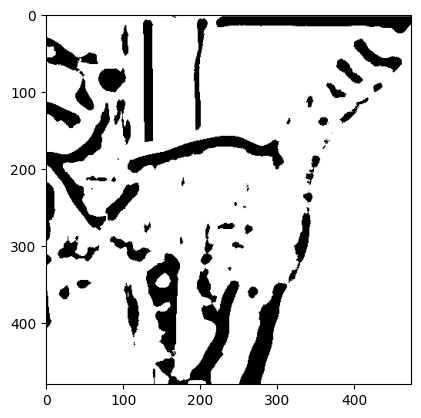

In [5]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

#image_path = "image_test/chien.jpeg"
pil_image = Image.open(input_path).convert('L')

img = np.array(pil_image)

img_blurred = cv2.medianBlur(img, 21)
img_thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 10)

pil_image_processed = Image.fromarray(img_thresh)

plt.imshow(pil_image_processed, cmap='gray')
plt.show()

In [6]:
## kernel

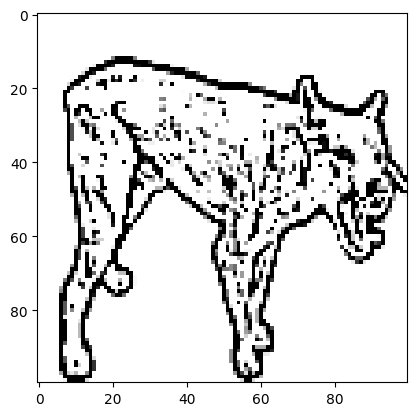

In [45]:
#image_path = "cat_dataset_1/images.cv_yfaip1vvxytk4pzkv6rhb/data/train/animal animal_faces cat cat_face/0AM9O53MDBX5.jpg"
inside = "/home/alex/Desktop/mistral_hackathon/src/image_to_ascii/data/FirstDataset/Dog/d7.png"
input = cv2.imread(inside)

image = remove(input)
plt.imshow(image, cmap='gray')

img_blurred = cv2.GaussianBlur(image,(5,5),15)
gray_img = cv2.cvtColor(img_blurred , cv2.COLOR_BGR2GRAY)
img_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

# To PIL Image
image = cv2.resize(img_thresh, (100, 100))
image = Image.fromarray(image)
image = np.array(image)

plt.imshow(image, cmap='gray')

In [46]:
filters = {
    ' ': np.array([[0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]]),

    '|': np.array([[-5,  0, 2,  0, -5],
                   [-1,  0, 2,  0, -1],
                   [-1,  0, 2,  0, -1],
                   [-1,  0, 2,  0, -1],
                   [-5,  0, 2,  0, -5]]),

    '-': np.array([[-2, -2, -2, -2, -2],
                   [ 0,  0,  0,  0,  0],
                   [ 3,  3,  3,  3,  3],
                   [ 0,  0,  0, 0, 0 ],
                   [-2, -2, -2, -2, -2]]),

    '"': np.array([[1,   5,  5,  5,  1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-2, -2, -2, -2, -2],]),

    '_': np.array([[-2, -2, -2, -2, -2],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [3,  3 ,  3,  3,  3]]),

    '/': np.array([[-6, -3, -1,  1,  2],
                   [-3, -1,  1,  2,  1],
                   [-1,  1,  2,  1, -1],
                   [1,   2,  1, -1, -3],
                   [2,   1, -1, -3, -6]]),

    '\\': np.array([[ 2,  1, -1, -3, -6],
                    [ 1,  2,  1, -1, -3],
                    [-1,  1,  2,  1, -1],
                    [-3, -1,  1,  2,  1],
                    [-6, -3, -1,  1,  2]]),
}

In [47]:
image.shape

(100, 100)

In [48]:
width, height = image.shape


# padding = 0
# border_color = [0, 0, 0]
# padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=border_color)

striding_factor = 2  # Adjust this as needed

filters_result = []
for filter in filters.values():
    filtered_image = cv2.filter2D(image, -1, filter)
    filtered_image = filtered_image[0::2]
    filters_result.append(filtered_image)

width, height = filtered_image.shape
filters_result = np.array(filters_result)

max_indices = np.argmax(filters_result, axis=0)
ascii_image = np.empty((width, height), dtype=str)

filter_chars = list(filters.keys())
print(image.shape)
for i in range(width):
    for j in range(height):
        ascii_image[i, j] = filter_chars[max_indices[i, j]]

with open("test.txt", "w") as file:
    for row in ascii_image:
        file.write("".join(row))
        file.write("\n")

(100, 100)


In [43]:
a = np.array([[1, 1, -1.2],
                   [1, -1.2, -1.2],
                   [1, 1, -1.2]])

np.sum(a)

0.20000000000000018